In [1]:
import numpy as np
import pickle
import os
import sys
import importlib

In [2]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu
import my_steven_free_utils as msfreeu
import meal_detection_utils as mdu
importlib.reload(mdu)


<module 'meal_detection_utils' from 'C:\\ASM\\Dropbox\\Developments\\Jupyter\\Eating\\meal_detection\\meal_detection_utils.py'>

In [3]:
hand='right'

if hand == 'right':
    ds = mfileu.read_file('data', 'free_data_steven_right_smoothed.pkl')
else:
    ds = mfileu.read_file('data', 'free_data_steven_left_smoothed.pkl')

annots = mfileu.read_file('data', 'free_data_steven_annots.pkl')

Subj, sess:  0 0
[[1.2760e+04 1.8760e+04 7.0000e+00]
 [1.9588e+05 1.9588e+05 1.0000e+00]
 [2.3212e+05 2.3212e+05 1.0000e+00]
 [2.9620e+05 3.2212e+05 4.9000e+01]
 [4.9180e+05 4.9180e+05 1.0000e+00]]


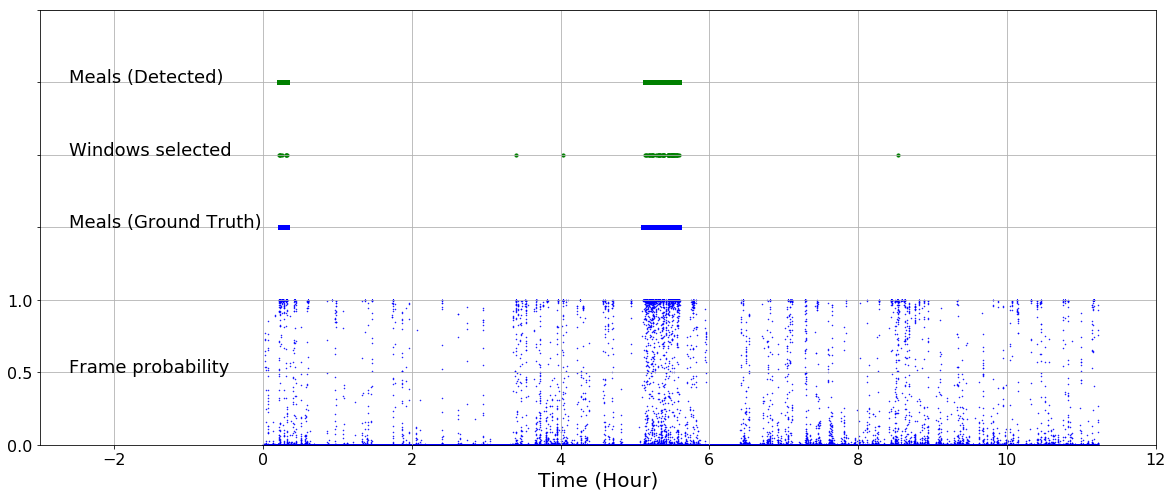

Subj, sess:  0 1
[[3.3880e+04 3.7960e+04 1.1000e+01]
 [1.9900e+05 1.9900e+05 1.0000e+00]
 [3.1084e+05 3.2164e+05 3.6000e+01]]


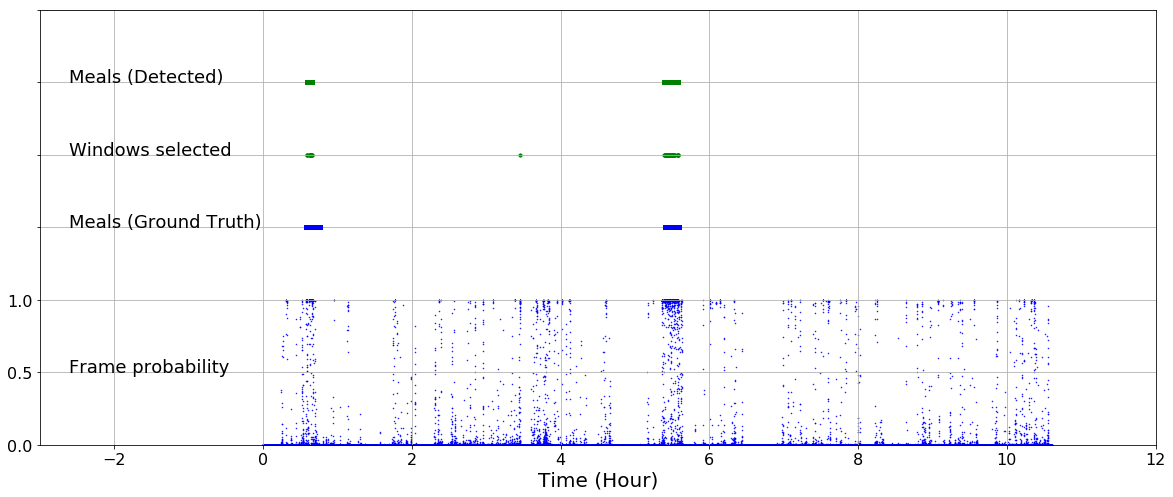

Subj, sess:  1 0
[[7.2400e+03 1.5400e+04 9.0000e+00]
 [2.5480e+04 2.5720e+04 2.0000e+00]
 [1.6036e+05 1.7188e+05 8.0000e+00]
 [3.9316e+05 3.9436e+05 6.0000e+00]
 [4.0204e+05 4.0468e+05 4.0000e+00]
 [5.2564e+05 5.2564e+05 1.0000e+00]]


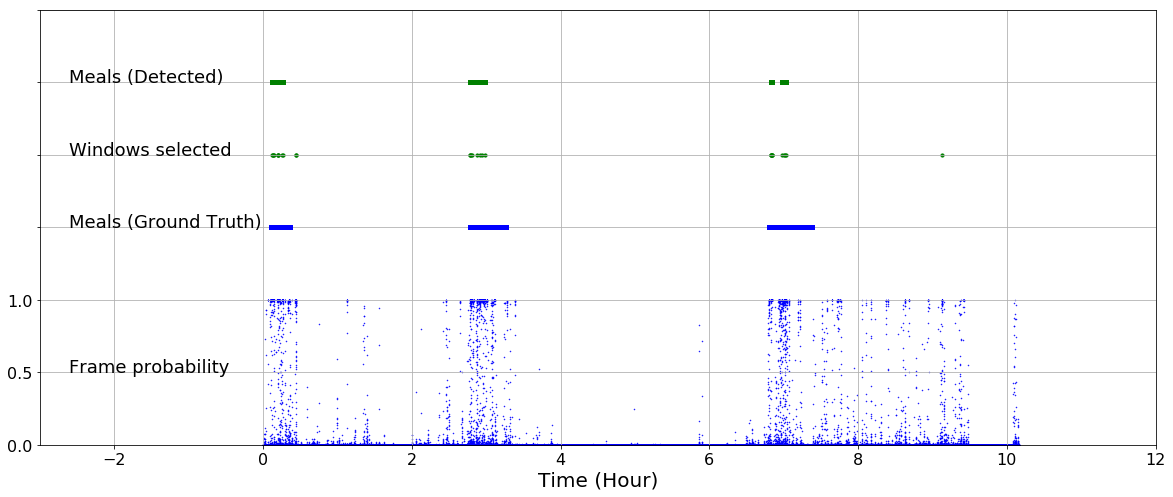

Subj, sess:  2 0
[[1.9036e+05 2.1748e+05 2.7000e+01]
 [5.1124e+05 5.2660e+05 2.7000e+01]]


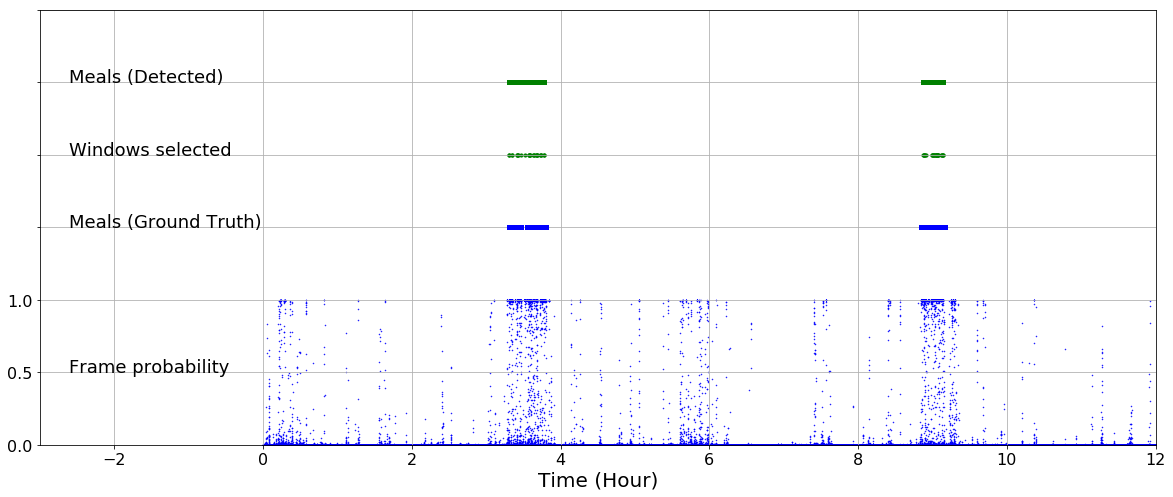

Subj, sess:  3 0
Annots cut at meal: 10/11, Times data, start: 25196, 27602
[[7.9240e+04 7.9240e+04 1.0000e+00]
 [3.5236e+05 3.6340e+05 3.0000e+01]]


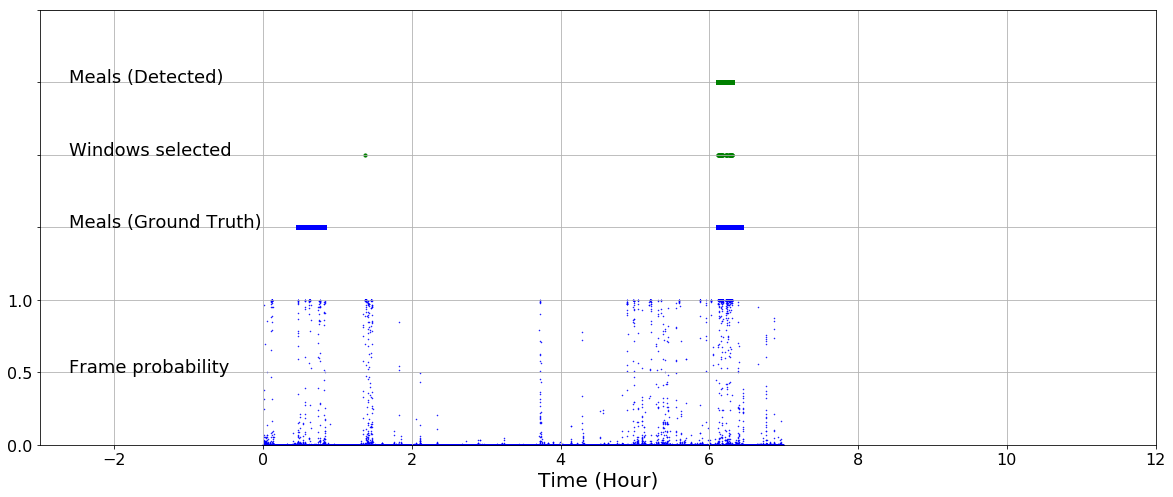

Subj, sess:  4 0
Annots cut at meal: 3/3, Times data, start: 30691, 31240
[[6.7000e+04 6.7720e+04 4.0000e+00]
 [2.0452e+05 2.1172e+05 1.1000e+01]]


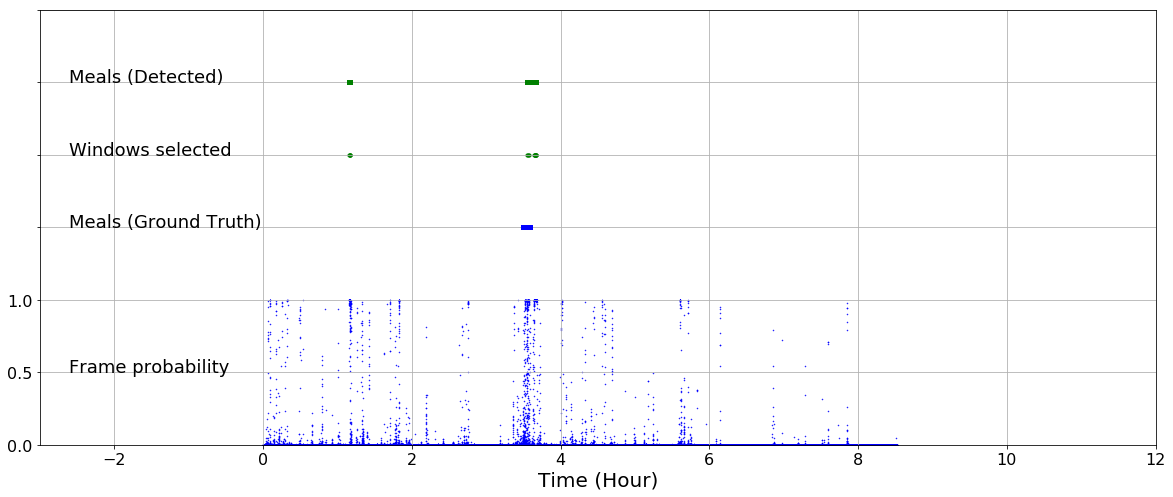

Subj, sess:  5 0
[[1.1080e+04 1.3240e+04 2.0000e+00]
 [1.8940e+05 1.9420e+05 5.0000e+00]
 [2.2972e+05 2.4556e+05 1.5000e+01]]


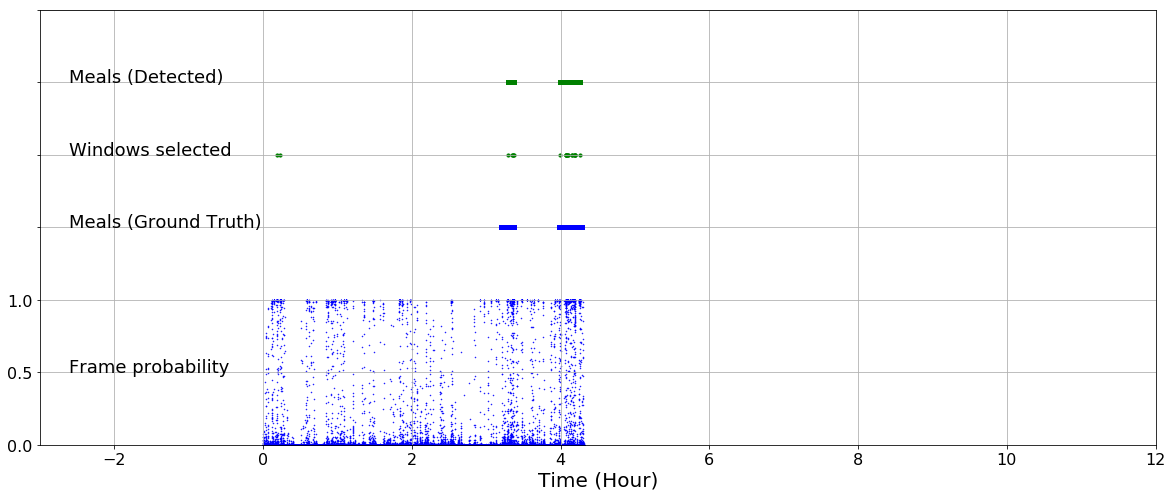

Subj, sess:  6 0
[[1.1428e+05 1.1500e+05 4.0000e+00]
 [1.2244e+05 1.3636e+05 4.9000e+01]
 [5.3236e+05 5.4052e+05 1.3000e+01]]


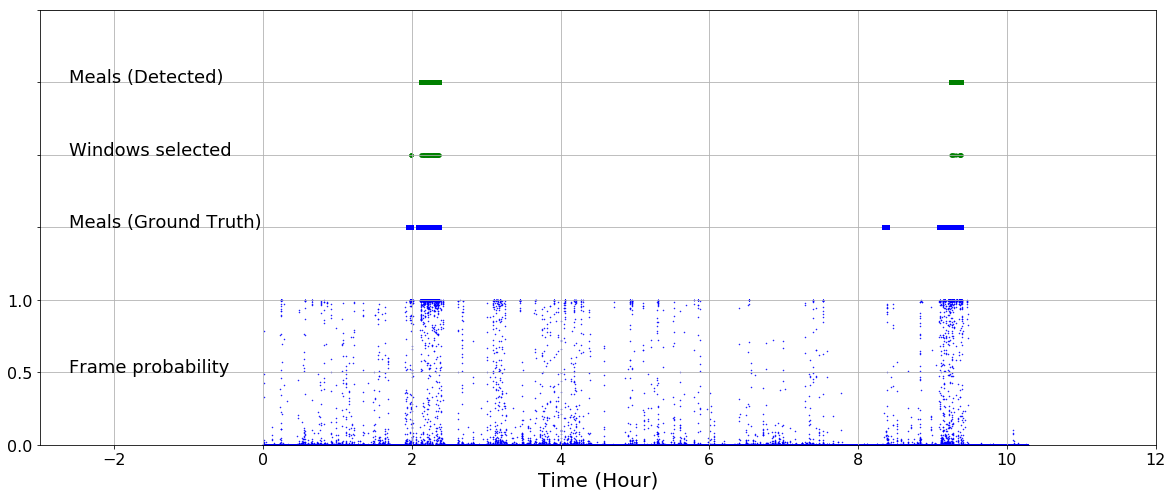

Subj, sess:  7 0
[[9.148e+04 9.148e+04 1.000e+00]]


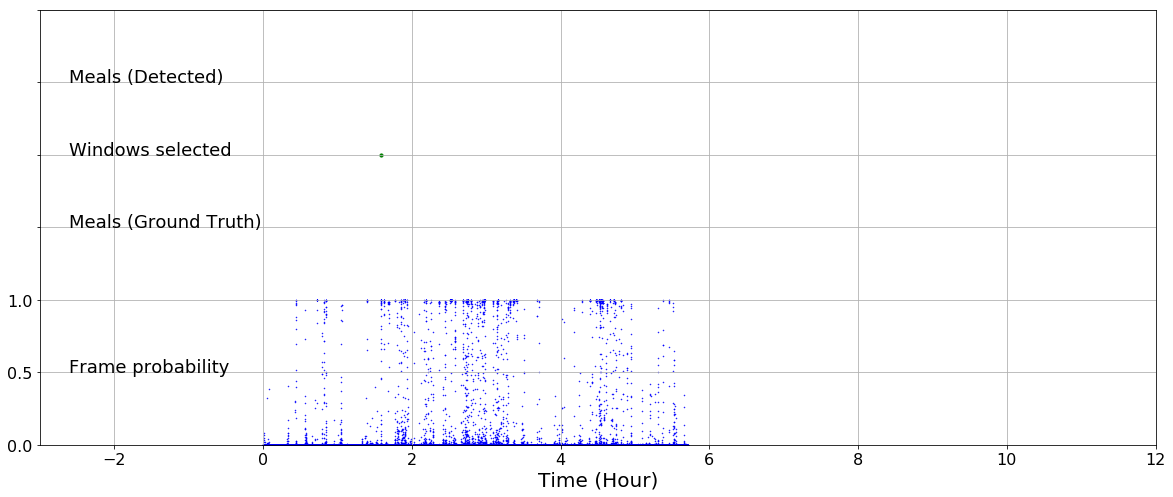

Subj, sess:  8 0
Annots cut at meal: 8/8, Times data, start: 38377, 38991
[[6.1348e+05 6.1348e+05 1.0000e+00]]


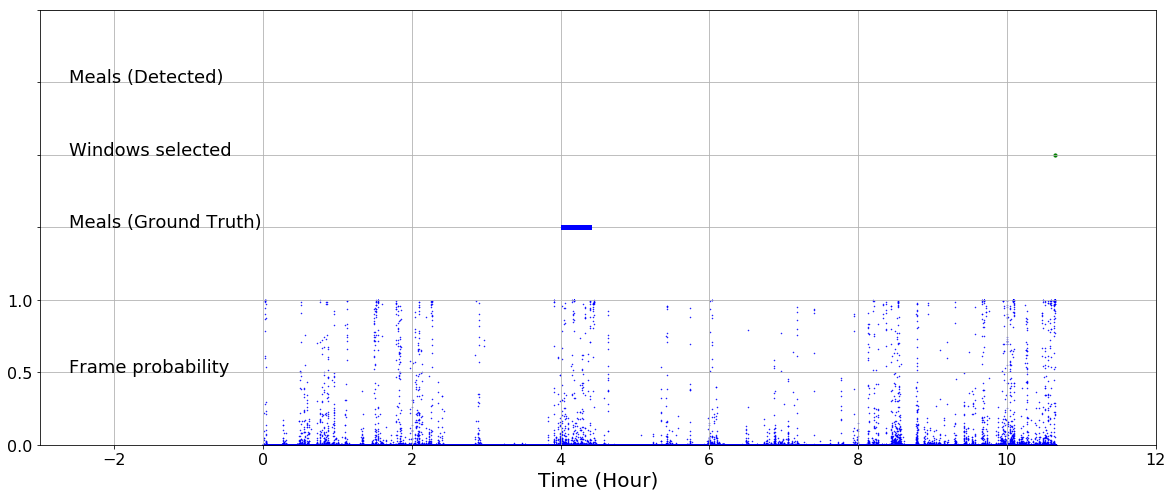

Subj, sess:  9 0
Annots end adjusted at meal: 4/4, Times data, end: 33252, 33050
[[1.9396e+05 2.2108e+05 4.2000e+01]
 [5.0068e+05 5.0068e+05 1.0000e+00]
 [5.2012e+05 5.2228e+05 2.0000e+00]
 [5.2972e+05 5.2972e+05 1.0000e+00]]


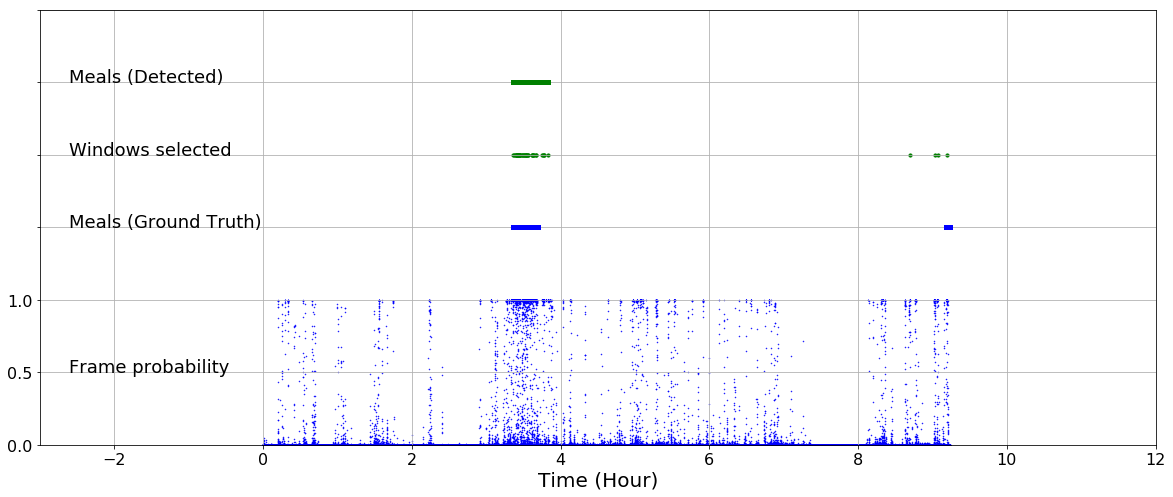

Subj, sess:  10 0
[[5.3044e+05 5.3452e+05 1.2000e+01]]


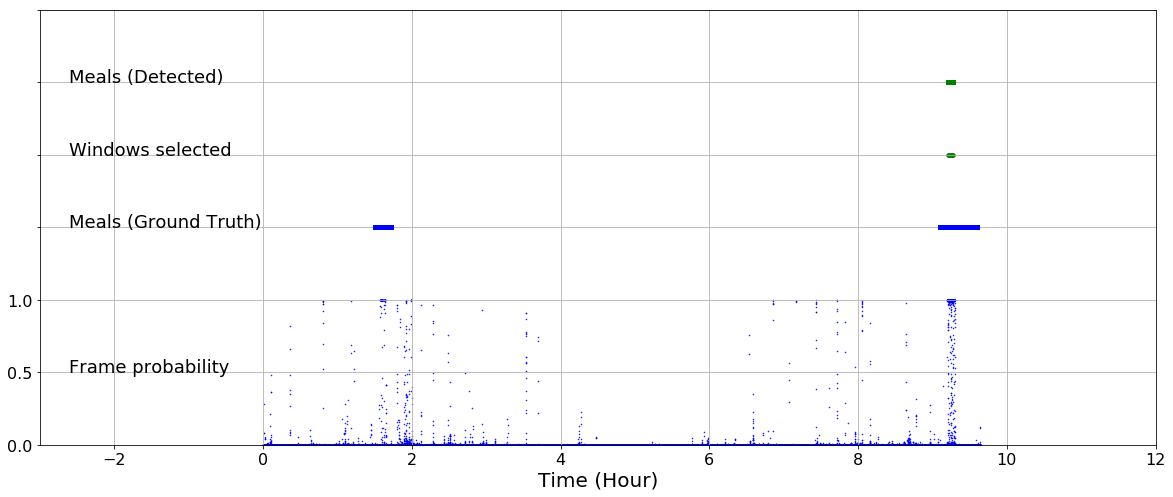

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

idf = 16*60*60 #index division factor
win_size = 5*16
for subj in range(11):
    res = mfileu.read_file('results_meal_winsize_160_vth_1_50_xth_0_free','subj_'+str(subj)+"_"+hand+".pkl") 
    #if hand=='right':
    #    res_bite = mfileu.read_file('results_bite_detection_free','subj_'+str(subj)+"_"+hand+".pkl")
        
    for sess in range(len(res)):
        if subj!=0 and sess!=0: 
            continue
            
        print('Subj, sess: ', subj, sess)
        a = np.copy(annots[subj][sess])
        dcount = len(ds[subj][sess])
        a = msfreeu.process_anntos(dcount, a)
        
        pred = res[sess]["pred"]
        indices = res[sess]["indices"]
        v = res[sess]["var"]
        gx= res[sess]["gx"]        
        
        #energy = mfeatu.get_energy(ds[subj][sess], 16)        
        pred = mdu.filter_by_var_gx(pred, var=v, gx=gx, hand=hand)        
        indices = indices[:, 2] + win_size//2
        
        c = mdu.find_clusters_free(indices, pred)
        print(c)
        c = c[c[:, 2]>=3, :]
        
        p = mdu.smooth_free(indices, pred)
        p = p[p[:, 1]>=0.5, :]
        p[:, 1] = 2
        

        #pred = mdpu.simple_moving_average(pred, 30).reshape((-1, 1))
        fig = plt.figure(figsize=(20,8))
        ax = plt.subplot(111)
        
        ax.scatter(indices/idf, pred[:, 0], marker='.', s=1, color='blue')                
        ax.scatter(p[:,0]/idf, p[:, 1], marker='o', s=10, color='green')                
        
        '''
        if hand=='right':
            bite_pred = res_bite[sess]["pred"]
            bite_indices = res_bite[sess]["indices"][:, 2]
            bite_var = res_bite[sess]["var"]        
            print(bite_indices.shape, bite_pred.shape, bite_var.shape)
            bite_pred = bite_pred[bite_var>=0.5, :]
            bite_indices = bite_indices[bite_var>=0.5]
            ax.scatter(bite_indices/idf, bite_pred[:, 0]+2, marker='x', s=1, color='green')        
        '''
        
        clrs = ['', 'blue', 'green', 'red', 'black']
        for i in range(len(a)):
            si = a[i, 0]/idf
            ei = a[i, 1]/idf
            mt = a[i, 2]
            if mt==1:
                ax.plot([si, ei], [1.5, 1.5], color=clrs[mt], linewidth=5)
                
        for i in range(len(c)):
            si = c[i, 0]/idf
            ei = c[i, 1]/idf            
            ax.plot([si, ei], [2.5, 2.5], color='green', linewidth=5)
                
        #plt.axhline(y=2.7)    
        #plt.axhline(y=6.3)    
        
        ax.set_yticklabels( (0.0, 0.5, 1.0) )
        plt.text(-2.6, 0.5, "Frame probability", fontsize=18)
        plt.text(-2.6, 1.5, "Meals (Ground Truth)", fontsize=18)
        plt.text(-2.6, 2, "Windows selected", fontsize=18)
        plt.text(-2.6, 2.5, "Meals (Detected)", fontsize=18)
        
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(16)
        
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(16)
        
        
        #plt.title(str(subj)+","+str(sess))
        plt.xlabel('Time (Hour)', fontsize=20)
        plt.xlim([-3, 12])
        plt.ylim([0, 3])
        plt.grid(True)
        plt.show()
        
        '''        
        fig = plt.figure(figsize=(20,8))
        ax = plt.subplot(111)          
        ax.plot(energy[:, 0]//16, energy[:, 1] )
        plt.title("Energy Gyro: "+str(subj)+","+str(sess))
        plt.ylim([0, 100])
        plt.grid(True)
        plt.show()
        
        fig = plt.figure(figsize=(20,8))
        ax = plt.subplot(111)          
        ax.plot(energy[:, 0]//16, energy[:, 2] )        
        plt.title("Energy Linaccel: "+str(subj)+","+str(sess))
        plt.ylim([0, 100])
        plt.grid(True)
        plt.show()
        '''
        